In [85]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
import sys
sys.version

'3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]'

In [87]:
print(torch.__version__)

1.9.1


In [88]:
print(torch.version.cuda)

11.1


In [89]:
import sys
print(sys.executable)

C:\Users\23\miniconda3\envs\jupi2\python.exe


In [90]:
print(sys.prefix)

C:\Users\23\miniconda3\envs\jupi2


In [91]:
words = open('names.txt', 'r').read().splitlines()

In [92]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [93]:
len(words)

32033

In [94]:
min(len(w) for w in words)

2

In [95]:
max(len(w) for w in words)

15

In [96]:
#for w in words[:1]:
#    for ch1, ch2 in zip(w, w[1:]):
#        print (ch1, ch2)

In [97]:
#w

In [98]:
#list(w)

In [99]:
#w[1:]

In [100]:
# for x, z in zip(w, w[1:]):
#     print(x, z)

In [101]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) +1
        # print (ch1, ch2)

In [102]:
# b

In [103]:
sorted(b.items(), key = lambda kv: -kv[1])


[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [104]:
# a = torch.zeros((3, 5))
# a = torch.zeros((3, 5), dtype=torch.int32)
# a

In [105]:
# a.dtype
# a[1, 3] = 1
# a[1, 3] += 1
# a

In [106]:
# N = torch.zeros((28, 28), dtype=torch.int32)
N = torch.zeros((27, 27), dtype=torch.float32)

In [107]:
# # set(''.join(words))
# # len(set(''.join(words)))
# chars = sorted(list(set(''.join(words))))
# stoi = {s:i for i,s in enumerate(chars)}
# stoi['<S>'] = 26
# stoi['<E>'] = 27

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [108]:
# stoi
# itos

In [109]:
# stoi

In [110]:

# for w in words:
#     chs = ['<S>'] + list(w) + ['<E>']
#     for ch1, ch2 in zip(chs, chs[1:]):
#         bigram = (ch1, ch2)
#         b[bigram] = b.get(bigram, 0) +1
        
# for w in words:
#     chs = ['<S>'] + list(w) + ['<E>']
#     for ch1, ch2 in zip(chs, chs[1:]):
#         ix1 = stoi[ch1]
#         ix2 = stoi[ch2]
#         N[ix1, ix2] += 1

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [111]:
# N

In [112]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.imshow(N)

In [113]:
# N[3, 3]
# type(N[3, 3])
# N[3, 3].item()

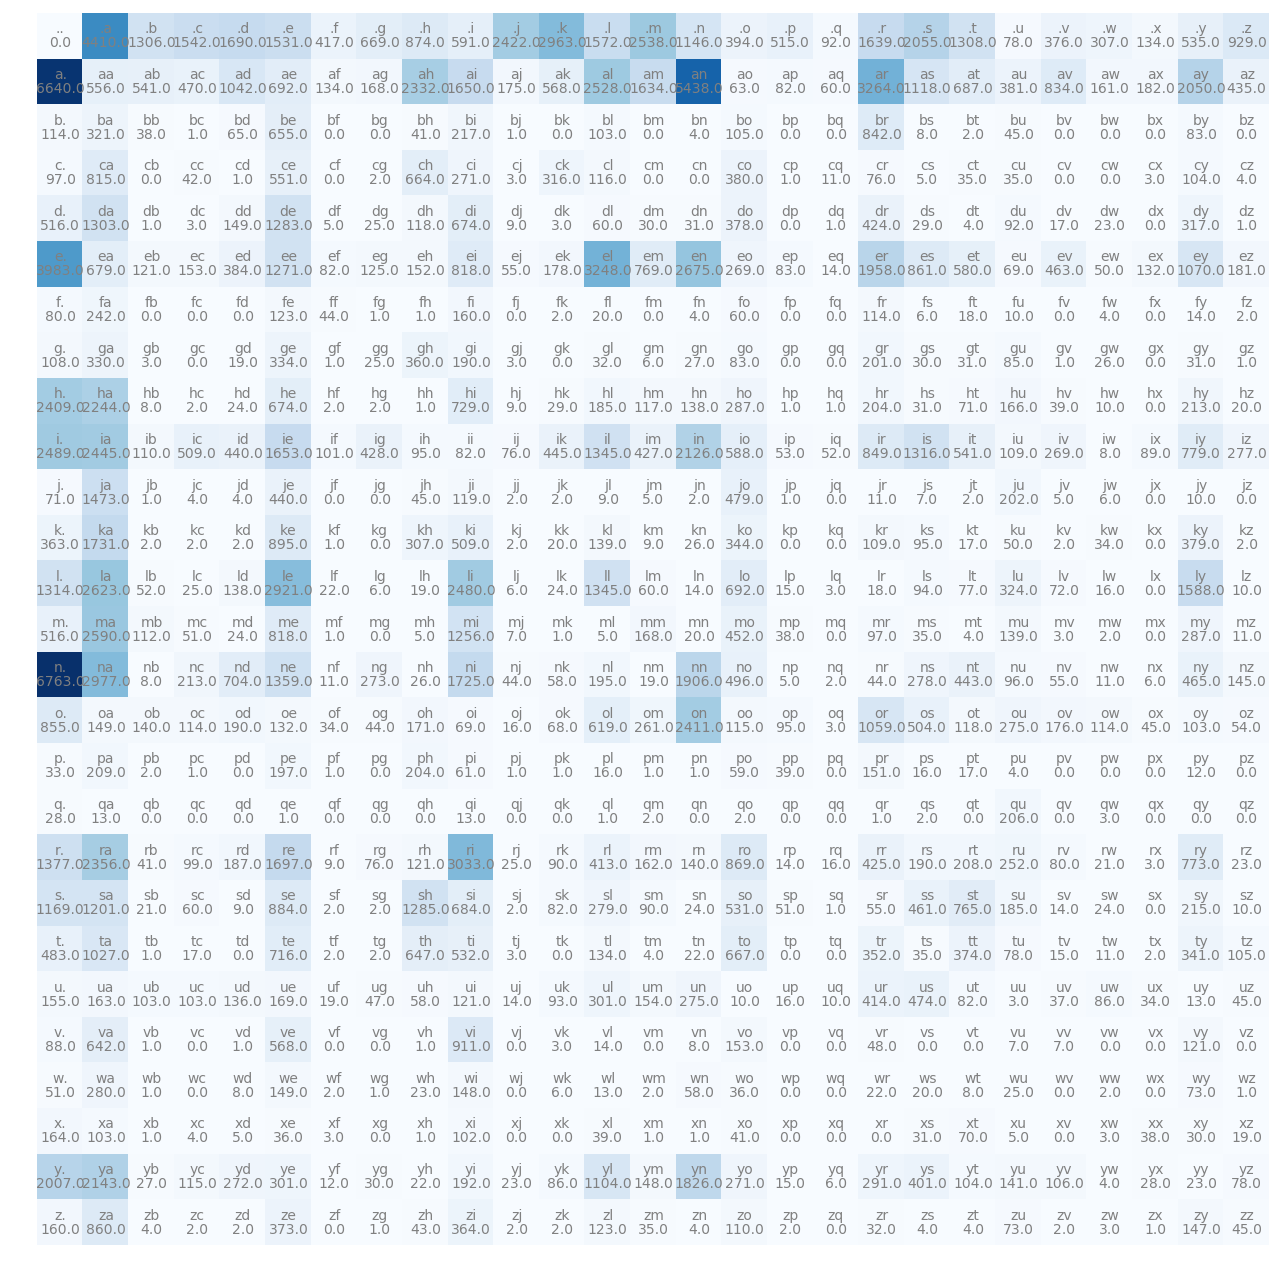

In [114]:

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [115]:
# N[0, :]
# N[0, :].shape
# result = N[0]
# print(result)
# N[0]
# print(N)
print(N[0].sum())


tensor(32033.)


In [116]:
N[0]

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])

In [117]:
# p = N[0].float()
# p

In [118]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [119]:
# p.sum()

In [120]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'm'

In [121]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [122]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [123]:
p.shape

torch.Size([3])

In [124]:
P.shape

torch.Size([27, 27])

In [125]:
P.sum(1).shape

torch.Size([27])

In [126]:
P.sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [127]:
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [128]:
# 27, 27 // Array
# 27,  1 // Array // TorchRules for Broadcasting: Each tensor has atleast one dimension. the dimension sizes must be equal, one of them is 1, or one of them does not exist

In [132]:
P = N.float()
P /= P.sum(1, keepdims=True)

In [130]:
P[:, 0].sum()

tensor(3.0222)

In [131]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        # p = N[ix].float()
        # p = p / p.sum()
        # p = torch.ones(27) / 27.0
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.
